### Second Attempt at Data Analysis of Ames Housing Dataset

#### Adapted from https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import starter packages

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('AmesHousing.csv')

In [4]:
# Check the shape of the data
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 2930 rows and 82 columns.


In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Cheapest house: $12,789.0
Most Expensive house: $755,000.0


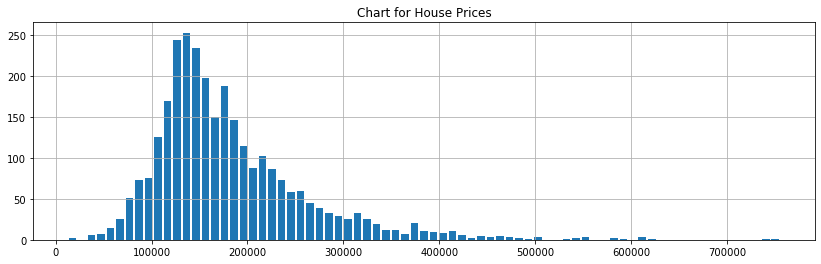

In [9]:
print('Cheapest house: ${:,.1f}'.format(df.SalePrice.min()))
print('Most Expensive house: ${:,.1f}'.format(df.SalePrice.max()))
plt.title('Chart for House Prices')
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.show()

Oldest house: 1872
Newest house: 2010


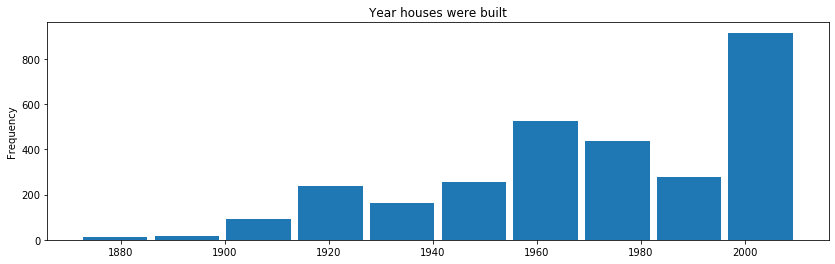

In [21]:
print('Oldest house: {}'.format(df['Year Built'].min()))
print('Newest house: {}'.format(df['Year Built'].max()))
df['Year Built'].plot(kind='hist', rwidth=.9, figsize=(14, 4))
plt.title('Year houses were built')
plt.show()